In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math



In [2]:

class Market:
    def __init__(self, steps, up_prob=0.5, point_change=0.1):
        self.up_prob = up_prob
        self.point_change = point_change
        self.current_value = 1.0
        self.steps = steps
        self.history = []

    def simulate_market(self):
        for _ in range(self.steps):
            direction = 1 if np.random.rand() < self.up_prob else -1
            self.current_value += direction * self.point_change
            self.history.append(self.current_value)
        return self.current_value

class Agent:
    def __init__(self, risk_function_type, parameter, belief_threshold, sell_threshold):
        self.risk_function_type = risk_function_type
        self.parameter = parameter  # alpha or gamma depending on the type
        self.belief_threshold = belief_threshold
        self.sell_threshold = sell_threshold
        self.bought_at = None
        self.sold_at = None
        self.has_sold = False

    def utility_function(self, x):
        if self.risk_function_type == 'log':
            return math.log(x)

        elif self.risk_function_type == 'exponential':
            alpha = self.parameter
            return -math.exp(-alpha * x)
        
        elif self.risk_function_type == 'power':
            gamma = self.parameter
            if gamma != 1:
                return x**(1 - gamma) / (1 - gamma)
            else:
                return math.log(x)
        
        else:
            raise ValueError("Invalid risk function type")

    def risk_aversion_function(self, market_value):
        return self.utility_function(market_value)
        
    def decide_to_buy(self, market_value, step, total_steps):
        probability_of_up = (total_steps - step) / total_steps
        adjusted_belief = probability_of_up / (1 + self.risk_aversion_function(market_value))

        if adjusted_belief > self.belief_threshold and self.bought_at is None:
            self.bought_at = market_value
            print(f"{self.risk_function_type} bought at: {market_value}")

    def decide_to_sell(self, market_value, step, total_steps):
        if self.bought_at is not None and not self.has_sold:
            probability_of_down = step / total_steps
            adjusted_belief = probability_of_down / (1 + self.risk_aversion_function(market_value))
            if adjusted_belief > self.sell_threshold:
                self.sold_at = market_value
                self.has_sold = True
                print(f"{self.risk_function_type} sold at: {market_value}")

    def calculate_final_value(self, final_market_value):
        if self.bought_at is not None:
            if self.sold_at is not None:
                return self.sold_at / self.bought_at
            else:
                return final_market_value / self.bought_at
        return 1


class LogarithmicAgent(Agent):
    def __init__(self, belief_threshold, sell_threshold):
        super().__init__('log', parameter=None, belief_threshold=belief_threshold, sell_threshold=sell_threshold)


class ExponentialAgent(Agent):
    def __init__(self, alpha, belief_threshold, sell_threshold):
        super().__init__('exponential', parameter=alpha, belief_threshold=belief_threshold, sell_threshold=sell_threshold)


class PowerFunctionAgent(Agent):
    def __init__(self, gamma, belief_threshold, sell_threshold):
        super().__init__('power', parameter=gamma, belief_threshold=belief_threshold, sell_threshold=sell_threshold)




exponential bought at: 1.01
power bought at: 1.01
exponential sold at: 1.5200000000000005
{'LogarithmicAgent': 1, 'ExponentialAgent': 1.5049504950495054, 'PowerFunctionAgent': 1.2475247524752477}


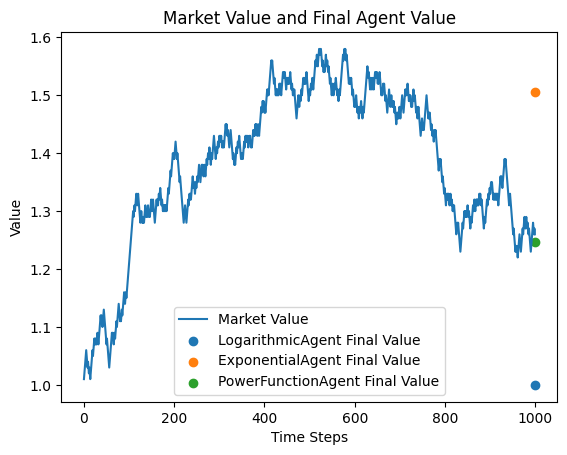

In [3]:


def simulate_agents_in_market(steps=1000, up_prob=0.51, point_change=0.01):
    market = Market(steps, up_prob, point_change)
    agents = [LogarithmicAgent(1.0,0.5), ExponentialAgent(3,1.0,0.5), PowerFunctionAgent(0.1,0.1,0.5)]
    final_market_value = market.simulate_market()
    final_values = {}

    for step, market_value in enumerate(market.history):
        for agent in agents:
            agent.decide_to_buy(market_value, step, steps)
            agent.decide_to_sell(market_value, step, steps)

    for agent in agents:
        final_values[agent.__class__.__name__] = agent.calculate_final_value(final_market_value)

    return final_values, market.history


def plot_results(final_values, market_history):
    plt.plot(market_history, label='Market Value')
    for agent_type, value in final_values.items():
        plt.scatter(len(market_history) - 1, value, label=f'{agent_type} Final Value')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.title('Market Value and Final Agent Value')
    plt.legend()
    plt.show()

# Run the simulation
final_values, market_history = simulate_agents_in_market()
print(final_values)
plot_results(final_values, market_history)


In [4]:

log_list = []
exp_list = [] 
pow_list = []

for _ in range(100):
    final_values, market_hist = simulate_agents_in_market()
    log_list.append(final_values["LogarithmicAgent"])
    exp_list.append(final_values['ExponentialAgent'])
    pow_list.append(final_values["PowerFunctionAgent"])

print("Log Average:", sum(log_list)/100)
print("Exponential Average:", sum(exp_list)/100)
print("Power Function Average:", sum(pow_list)/100)


exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.94
log sold at: 0.7699999999999998
exponential sold at: 0.94
power sold at: 0.7399999999999998
exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.99
exponential sold at: 1.2300000000000002
log sold at: 1.2000000000000002
exponential bought at: 1.01
power bought at: 1.01
exponential sold at: 1.2400000000000002
exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.99
exponential sold at: 1.2600000000000002
log sold at: 1.3000000000000003
exponential bought at: 1.01
power bought at: 1.01
exponential sold at: 1.01
exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.97
exponential sold at: 1.2600000000000002
log sold at: 1.5800000000000005
exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.99
log sold at: 0.8499999999999999
exponential sold at: 0.9299999999999999
exponential bought at: 1.01
power bought at: 1.01
log bought at: 0.98
exponential sold at: 1.14000000000